In [4]:
%matplotlib inline
import seaborn as sns
import  matplotlib.pyplot as plt
%config InlineDackend.figure_format = 'svg'
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
data = datasets.load_boston()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
df = pd.DataFrame(data.data, columns = data.feature_names )
df.columns = map(str.lower, df.columns)
df['prace'] = data.target
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,prace
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


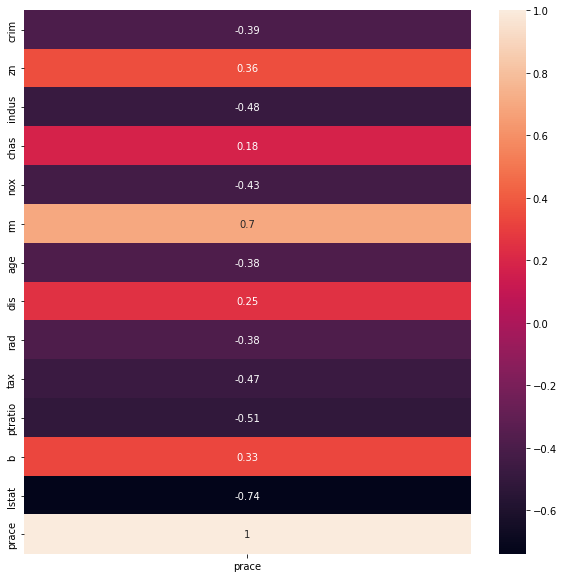

In [7]:
plt.figure(figsize=(10,10))
df_corr = df.corr().round(2)[['prace']]
sns.heatmap(data=df_corr, annot = True)

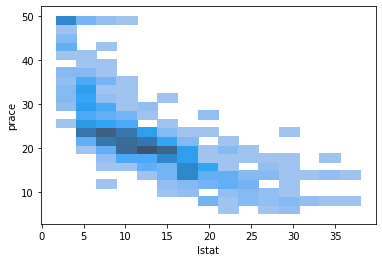

In [8]:
sns.histplot(data = df, x = "lstat" , y = 'prace')

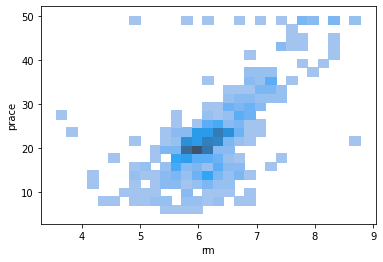

In [9]:
sns.histplot(data = df, x = "rm" , y = 'prace')

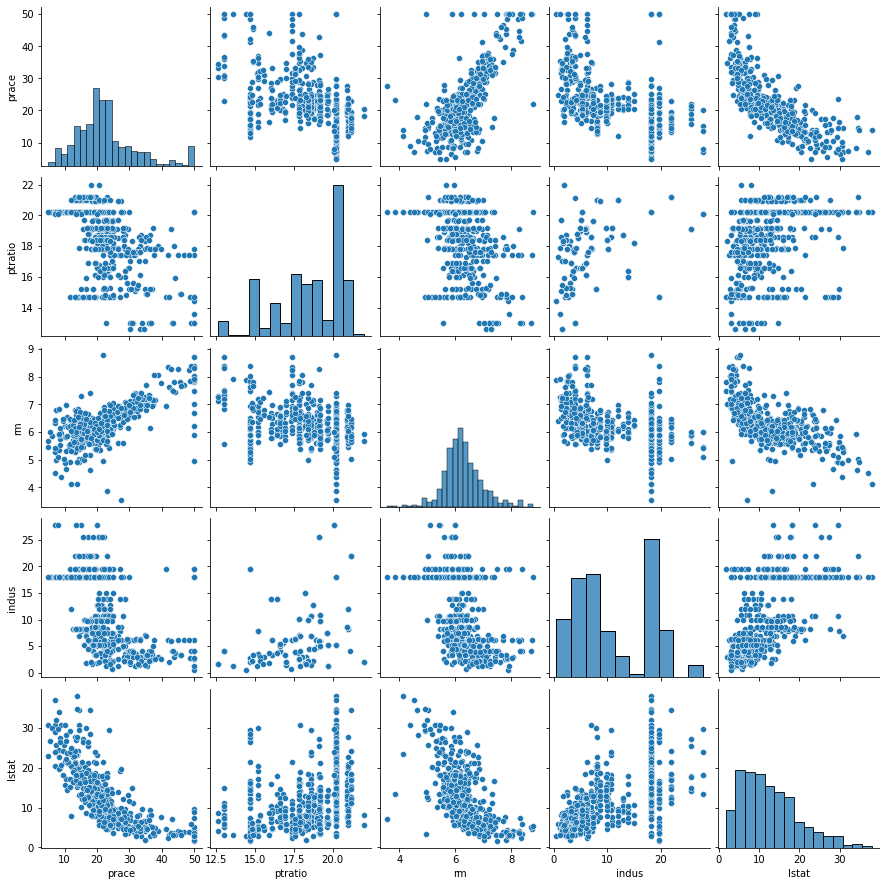

In [10]:
sns.pairplot(df[["prace", 'ptratio', 'rm', "indus","lstat" ]])

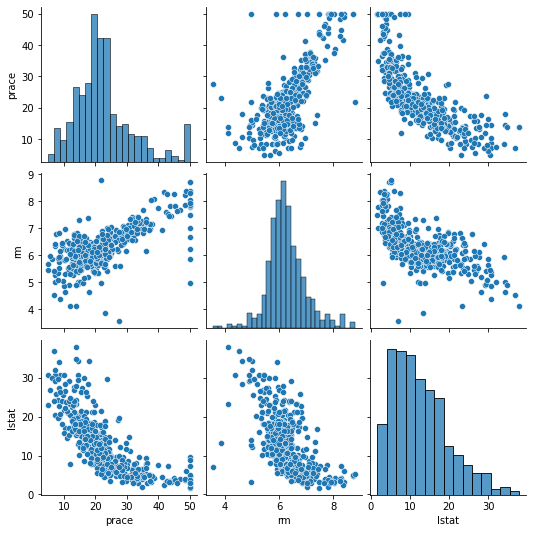

In [17]:
sns.pairplot(df[["prace", "rm", "lstat"]])

In [19]:
df["guesswork_rm"] = df["rm"] * 11.5-50
df["guesswork_lstat"] = df["lstat"] * (-1)+35
df["guesswork_ls2"] = 85/df['lstat'] + 16 - 0.3*df['lstat'] 
df['guesswork_middle'] = (df['guesswork_ls2'] + df['guesswork_rm'])/2
df['guess_ans'] = (df['guesswork_ls2'] + df['guesswork_rm']+df['guesswork_lstat'])/3

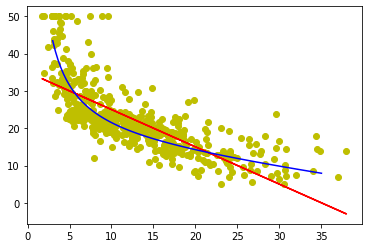

In [20]:
plt.plot(df['lstat'], df["prace"], 'ro', color = 'y')
plt.plot(df['lstat'], df['guesswork_lstat'], color = 'r')
y = lambda x: 85/(x) + 16 - 0.3*x
x = np.linspace(3, 35,100)
plt.plot(x, y(x), color = 'b')
plt.show()

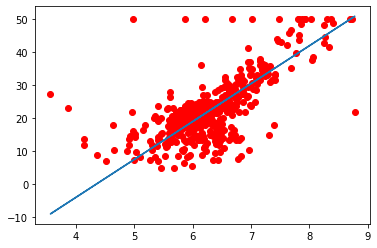

In [21]:
plt.plot(df['rm'], df["prace"], 'ro')
plt.plot(df['rm'], df["guesswork_rm"])
plt.show()

In [22]:
min = 100
x = df['rm']
ln = len(x)
for a in range(1000,2000,5):
  for b in np.linspace(5000,7000,5):
        y = a*x/(100) - b/100
        D = sum((df['prace'] - y)**2) / ln
        if D < min:
          min = D
          a1 = a/100
          b1 = b/100
print(a1)
print(b1)
print(min)

11.5
50.0
46.50083669120556


In [23]:
min = 100
x = df['lstat']
ln = len(x)
for a in range(8000,10000,5):
  for b in np.linspace(1300,1900,5):
    for c in np.linspace(0, 100, 5):
        y = a/(100*x) + b/100 - c*x/100
        D = sum((df['prace'] - y)**2) / ln
        if D < min:
          min = D
          a1 = a/100
          b1 = b/100
          c1 = c/100
print(a1)
print(b1)
print(c1)
print(min)

83.1
16.0
0.25
28.448593898696124


ого руками так близко угадал

In [116]:
def D(col1, col2):
  return(sum((col1-col2)**2/len(col1)))

In [117]:
print(D(df['guesswork_ls2'], df['prace']))
print(D(df['guesswork_lstat'], df['prace']))
print(D(df['guesswork_rm'], df['prace']))

29.25033545221766
38.64449861660083
46.500836691205556


In [118]:

D(df['guesswork_middle'], df['prace'])

26.52711029615252

In [119]:
D(df['guess_ans'],df['prace'])

26.10335732980322

Теперь обучим

In [120]:
a = pd.DataFrame(data.data, columns = data.feature_names )
a.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [121]:
data0 = pd.DataFrame(data.data, columns = data.feature_names ).to_numpy()
d_prace = data.target
data0

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data0, d_prace, test_size=0.3, random_state=11)

In [123]:
ar = np.concatenate((np.matrix(X_train), np.ones((X_train.shape[0], 1))), axis = 1)
ans = (ar.T*ar).I*ar.T*np.matrix(y_train).T
ans

matrix([[-1.07707214e-01],
        [ 4.67799551e-02],
        [ 4.26891061e-02],
        [ 2.72099245e+00],
        [-1.90032677e+01],
        [ 4.10794130e+00],
        [ 1.54691712e-02],
        [-1.34227114e+00],
        [ 3.68881126e-01],
        [-1.55220998e-02],
        [-9.07592891e-01],
        [ 1.09455742e-02],
        [-5.04662086e-01],
        [ 3.26003842e+01]])

In [124]:
def D1(y_real, y_pred):
    ans = 0
    for i in range(len(y_real)):
        ans += (y_real[i] - y_pred[i])**2
    return ans/len(y_pred)

In [125]:
array = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis = 1)
my_ans = array*ans
D1(y_test, my_ans)

matrix([[25.0141307]])